# INDUSTRY MENTORSHIP PROJECT 

# DRIVER DROWSINESS RECOGNITION

# MENTORS : 

## MS. DIVYA JAIN

## MS. VAISHALI BABBAR

# TEAM :

## ADITYA CHAUDHARY

## AMAN SHARMA

## DEEPANSHU GANDHI

## DEVESH BHATIA

# Image Processing

Import the Libraries

In [148]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Read the Image

In [149]:
original_image = cv2.imread("image.jpg") # imread() is used to read the image by passing path as an arguements

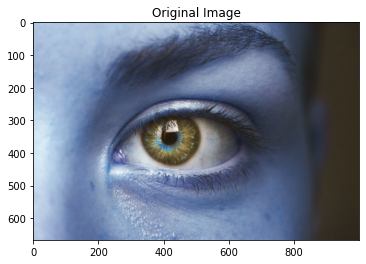

In [150]:
plt.title('Original Image')
plt.imshow(original_image);

Image Type

In [151]:
type(original_image)  # used to check the type of image

numpy.ndarray

Shape of Image

In [152]:
original_image.shape  # return number of rows and columns in image 

(667, 1000, 3)

Size of Image

In [153]:
original_image.size # total number of pixels in image

2001000

Resize Image

In [154]:
resize_image=cv2.resize(original_image,(600,600))  # resizing the image

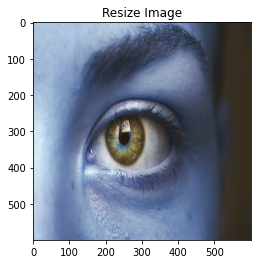

In [155]:
plt.title('Resize Image')
plt.imshow(resize_image);

Rotate Image

In [156]:
rotate_image=cv2.rotate(original_image,cv2.ROTATE_90_CLOCKWISE) # rotate the image

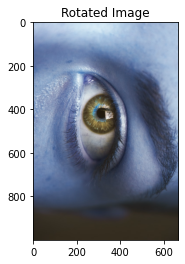

In [157]:
plt.title('Rotated Image')
plt.imshow(rotate_image);

Crop Image

In [158]:
cropped_image=original_image[200:400,200:400] # cropped the image


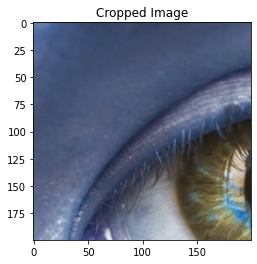

In [159]:
plt.title('Cropped Image')
plt.imshow(cropped_image);

Detect Edges

In [160]:
edge_image = cv2.Canny(original_image,100,150) # Canny() method is used to detect edges in image

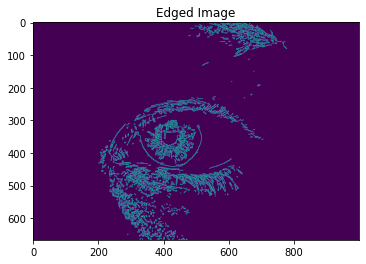

In [161]:
plt.title('Edged Image')
plt.imshow(edge_image);

 Convert image to grayscale

In [162]:
grayscale_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)  

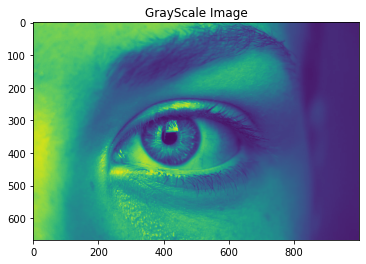

In [163]:
plt.title('GrayScale Image')
plt.imshow(grayscale_image);

Convert image to RGB

In [164]:
rgb_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)  

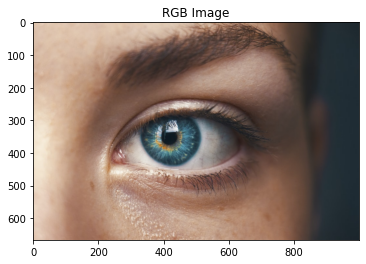

In [165]:
plt.title('RGB Image')
plt.imshow(rgb_image);

Reduce Noise

In [166]:
result = cv2.fastNlMeansDenoisingColored(original_image,None,20,10,7,21)

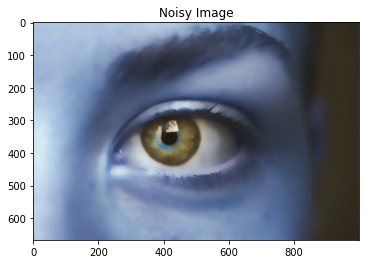

In [167]:
plt.title('Noisy Image')
plt.imshow(result);

Blur Image

In [168]:
blur_image = cv2.GaussianBlur(original_image, (11,11), cv2.BORDER_DEFAULT)

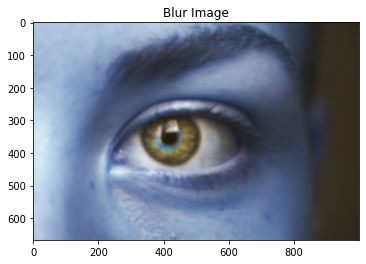

In [169]:
plt.title('Blur Image')
plt.imshow(blur_image);

# Dataset

## MRL Eye Dataset 

This dataset contains infrared images in low and high resolution, which are captured in various lightning conditions and by different devices. The dataset is suitable for testing several features or trainable classifiers. In order to simplify the comparison of algorithms, the images are divided into several categories, which also makes them suitable for training and testing classifiers. The Dataset contains around 10000 images in which which we use 2000 images for training. Also , there is need for categorization for dataset into open and closed eyes in different folders. 

### Sample of Image in dataset

In [173]:
img_array = cv2.imread("Dataset/Open/s0012_05125_0_0_1_2_1_03.png",cv2.IMREAD_GRAYSCALE)

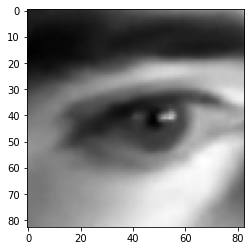

In [174]:
plt.imshow(img_array,cmap="gray");

In [175]:
img_array.shape

(83, 83)

# Dataset Directory

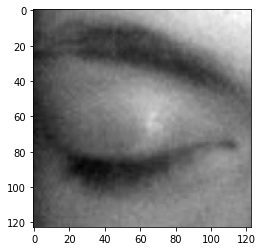

In [176]:
Datadirectory = "Train_Dataset/" 
Classes = ["Close","Open"]
for category in Classes:
    path = os.path.join(Datadirectory, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

#### Resize the Image

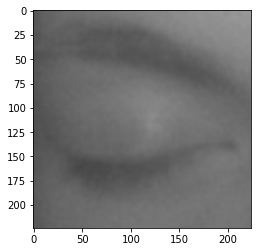

In [177]:
img_size=224

new_array=cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# Data Labelling

In [178]:
training_Data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        classes_num = Classes.index(category) # 0 1,
        for img in os.listdir(path):
            try:
                imgarray = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append((new_array,classes_num))
            except Exception as e:
                pass

In [179]:
create_training_data()


In [180]:
print(len(training_Data))

1472


In [181]:
#shuffle the list
import random 
random.shuffle(training_Data)

In [182]:
x = []
y = []

for features,label in training_Data:
    x.append(features)
    y.append(label)
    
x= np.array(x).reshape(-1, img_size, img_size, 3)

In [183]:
x.shape

(1472, 224, 224, 3)

In [184]:
#normalize the data
x=x/255

In [185]:
y = np.array(y)

In [186]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Deep Learning Model

In [106]:
model = tf.keras.applications.mobilenet.MobileNet()

In [107]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# Transfer Learning

In [108]:
base_input = model.layers[0].input ##input

In [109]:
base_output = model.layers[-4].output

In [110]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ##one node (1/0)
final_output = layers.Activation('sigmoid')(final_output)

In [111]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [112]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

# Settings for Binary Classification (open/closed)

In [113]:
new_model.compile(loss="binary_crossentropy",optimizer = "adam",metrics=["accuracy"])

In [136]:
new_model.fit(x,y, epochs = 5,validation_split = 0.1) #training

Epoch 1/5
59/59 [==============================] - 355s 6s/step - loss: 0.7805 - accuracy: 0.8872 - val_loss: 0.6922 - val_accuracy: 0.5433
Epoch 2/5
59/59 [==============================] - 362s 6s/step - loss: 0.7367 - accuracy: 0.8930 - val_loss: 0.7316 - val_accuracy: 0.5433
Epoch 3/5
59/59 [==============================] - 312s 5s/step - loss: 0.7445 - accuracy: 0.9011 - val_loss: 0.8406 - val_accuracy: 0.4567
Epoch 4/5
59/59 [==============================] - 296s 5s/step - loss: 0.7155 - accuracy: 0.9070 - val_loss: 0.7753 - val_accuracy: 0.4567
Epoch 5/5
59/59 [==============================] - 290s 5s/step - loss: 0.7157 - accuracy: 0.9112 - val_loss: 0.6977 - val_accuracy: 0.4567


In [115]:
new_model.save('my_model.h5')

In [116]:
new_model = tf.keras.models.load_model('my_model.h5')

# Checking for predictions

In [187]:
img_array = cv2.imread('Test_Dataset\Close\s0002_00162_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [188]:
X_input = np.array(new_array).reshape(1,img_size, img_size, 3)

In [189]:
X_input.shape

(1, 224, 224, 3)

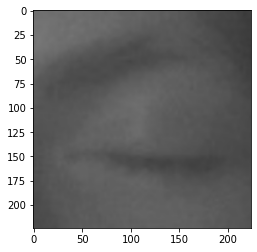

In [190]:
plt.imshow(new_array)

In [121]:
X_input=X_input/255.0

In [122]:
prediction = new_model.predict(X_input)

In [137]:
prediction


array([[-0.1590624]], dtype=float32)


In [191]:
img_array = cv2.imread('Test_Dataset\Open\s0012_05140_0_0_1_2_1_03.png.',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [192]:
X_input = np.array(new_array).reshape(1,img_size, img_size, 3)

In [193]:
X_input.shape

(1, 224, 224, 3)

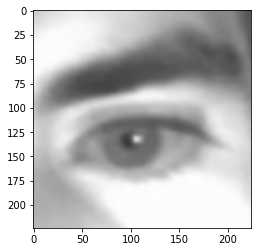

In [194]:
plt.imshow(new_array)

In [195]:
X_input=X_input/255.0

In [196]:
prediction = new_model.predict(X_input)

In [143]:
prediction

array([[0.12279326]], dtype=float32)


# Check on Unknown Images

In [144]:
img=cv2.imread('myimage.jpg')

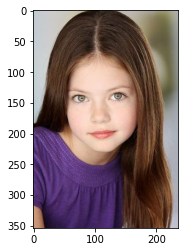

In [145]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [146]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt.xml')

In [147]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [66]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [67]:
eyes=eyeCascade.detectMultiScale(gray,1.1,4)

In [68]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w, y+h),(0,255,0),2)

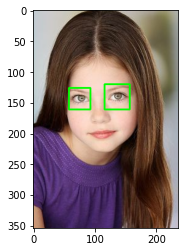

In [69]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [70]:
# cropping the eye image

In [71]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

eyes=eyeCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyess=eyeCascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("Eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]
            

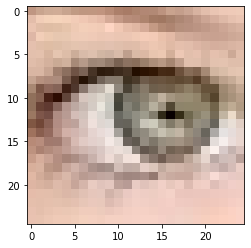

In [72]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [73]:
eyes_roi.shape

(25, 25, 3)

In [74]:
final_img=cv2.resize(eyes_roi,(224,224))
final_img=np.expand_dims(final_img,axis=0)
final_img=final_img/255.0


In [75]:
final_img.shape

(1, 224, 224, 3)

In [76]:
new_model.predict(final_img)

array([[0.23686865]], dtype=float32)

# Driver Drowsiness Detection

In [1]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time


mixer.init()
sound = mixer.Sound('alarm.wav')

face = cv2.CascadeClassifier('haar cascade files\haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('haar cascade files\haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('haar cascade files\haarcascade_righteye_2splits.xml')



lbl=['Close','Open']

model = load_model('models/cnncat2.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2] 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(gray)
    right_eye =  reye.detectMultiScale(gray)

    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )

    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye,(24,24))
        r_eye= r_eye/255
        r_eye=  r_eye.reshape(24,24,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        rpred = model.predict_classes(r_eye)
        # rpred=np.argmax(model.predict(r_eye), axis=0) 
        if(rpred[0]==1):
            lbl='Open' 
        if(rpred[0]==0):
            lbl='Closed'
        break

    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
        l_eye = cv2.resize(l_eye,(24,24))
        l_eye= l_eye/255
        l_eye=l_eye.reshape(24,24,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = model.predict_classes(l_eye)
        # lpred=np.argmax(model.predict(l_eye), axis=0) 

        if(lpred[0]==1):
            lbl='Open'   
        if(lpred[0]==0):
            lbl='Closed'
        break

    if(rpred[0]==0 and lpred[0]==0):
        score=score+1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    # if(rpred[0]==1 or lpred[0]==1):
    else:
        score=score-1
        cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    
        
    if(score<0):
        score=0   
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>15):
        #person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join(path,'image.jpg'),frame)
        try:
            sound.play()
            
        except:  # isplaying = False
            pass
        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


pygame 2.0.1 (SDL 2.0.14, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


c:\users\devesh\appdata\local\programs\python\python38\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
